### Importaciones y lecturas

In [15]:
import pandas as pd
import numpy as np
import collections
from collections import Counter
import matplotlib.pyplot as plt
import shutil
import dataframe_image as dfi

In [2]:
dfAll = pd.read_csv('/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Tablas/dfAll.csv')

In [3]:
dfAll.shape

(777715, 21)

In [4]:
dfAll.head(5)

,Unnamed: 0,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,YEARS_BIRTH,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,...,32.89,12.44,1,1,0,0,NaN,2.0,0,C
1,1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,...,32.89,12.44,1,1,0,0,NaN,2.0,-1,C
2,2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,...,32.89,12.44,1,1,0,0,NaN,2.0,-2,C
3,3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,...,32.89,12.44,1,1,0,0,NaN,2.0,-3,C
4,4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,...,32.89,12.44,1,1,0,0,NaN,2.0,-4,C


### KPI 1 Cantidad en clientes por STATUS

#### Parametros para ciclo

In [5]:
### Definicion de variables

### variable_df_mes                          ###   == variable_mes
mes_actual= dfAll[ ( dfAll['MONTHS_BALANCE'] == 0 )   ]        
mes_m1= dfAll[ ( dfAll['MONTHS_BALANCE'] == -1 )   ]

In [6]:
### Keys y contadores (diccionario) para STATUS por cada mes

### variable_dic_mes         # Variable_df_mes
dic_mes_actual = Counter(mes_actual['STATUS'])
dic_mes_m1 = Counter(mes_m1['STATUS'])
dic_mes_m1

Counter({'C': 12797,
         'X': 4201,
         '0': 7606,
         '1': 268,
         '5': 57,
         '4': 11,
         '2': 17,
         '3': 6})

In [7]:
# Diccionario Ordenados por keys

### variable_dic_mes                                 ### variable_dic_mes
dic_mes_actual = collections.OrderedDict(  sorted(  dic_mes_actual.items()  )  )    
dic_mes_m1 = collections.OrderedDict(  sorted(  dic_mes_m1.items()  )  )
dic_mes_m1

OrderedDict([('0', 7606),
             ('1', 268),
             ('2', 17),
             ('3', 6),
             ('4', 11),
             ('5', 57),
             ('C', 12797),
             ('X', 4201)])

In [8]:
# Diccionario a Listas de valores ordenados por keys

# Index
lista_index = list(  dic_mes_actual.keys()  )

# Variable_lista_mes           ### Variable_dic_mes 
lista_mes_actual = list(  dic_mes_actual.values()  )    
lista_mes_m1 = list(  dic_mes_m1.values()  ) 

lista_index, lista_mes_m1

(['0', '1', '2', '3', '4', '5', 'C', 'X'],
 [7606, 268, 17, 6, 11, 57, 12797, 4201])

In [9]:
# Crear lista de sumatorias de lista por mes 
# Crear lista final

lista_mes_total = list ( zip(lista_mes_actual, lista_mes_m1 ) )
lista_mes_total

[(6886, 7606),
 (236, 268),
 (19, 17),
 (6, 6),
 (5, 11),
 (59, 57),
 (12974, 12797),
 (4487, 4201)]

In [10]:
### Convertir listas de sumatorias en Data Frames 
                                                                          # lista_nombre:                                                                      
KPI = pd.DataFrame(  lista_mes_total, index= lista_index, columns= ('mes_actual', 'mes_m1') )  
KPI

,mes_actual,mes_m1
0,6886,7606
1,236,268
2,19,17
3,6,6
4,5,11
5,59,57
C,12974,12797
X,4487,4201


#### Ciclo para Data Frame con KPI 1

In [11]:
                            # Fijado a -2

lista_mes = []
lista_nombre_mes = []
                             # Se fija a -26 meses
for variable_mes in range (-26,1):
    variable_df_mes = dfAll[ ( dfAll['MONTHS_BALANCE'] == variable_mes )   ] ### Definicion de meses
    variable_dic_mes = Counter(variable_df_mes['STATUS'])  ### Keys y contadores para STATUS por cada mes
    variable_dic_mes = collections.OrderedDict(  sorted(  variable_dic_mes.items()  )  ) # Valores de diccionarios ordenados por keys

    variable_lista_mes = list(  variable_dic_mes.values()  )      # Valores YA ordenados por keys
    lista_mes.append(variable_lista_mes) # Agregar valores YA ordenados a lista

    variable_nombre_mes = variable_mes
    lista_nombre_mes.append(variable_nombre_mes)

lista_mes = np.array(lista_mes).T
lista_index = list(  dic_mes_actual.keys()  )

                                                                          # lista_nombre:                                                                      
KPI_1 = pd.DataFrame(  lista_mes, index= lista_index, columns= lista_nombre_mes )  
KPI_1.to_csv( '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Tablas/KPI_1.csv'  )

In [12]:
KPI_1

,-26,-25,-24,-23,-22,-21,-20,-19,-18,-17,...,-9,-8,-7,-6,-5,-4,-3,-2,-1,0
0,5414,5586,5752,5882,6012,6024,6249,6245,6273,6413,...,7191,7231,7427,7461,7681,7687,7850,7700,7606,6886
1,166,172,172,165,167,179,181,183,178,182,...,214,224,238,248,241,307,219,274,268,236
2,17,18,13,15,11,19,12,24,28,12,...,20,24,15,19,18,19,30,19,17,19
3,6,4,5,3,9,1,5,3,8,9,...,6,7,9,7,9,5,6,11,6,6
4,7,5,3,5,3,9,1,4,2,6,...,4,4,6,8,9,8,5,3,11,5
5,25,25,29,27,27,31,34,36,33,36,...,42,38,40,44,50,50,50,52,57,59
C,6024,6315,6596,6886,7125,7429,7696,7955,8234,8550,...,10615,10885,11162,11444,11729,11995,12277,12531,12797,12974
X,2796,2825,2891,2954,3019,3071,3013,3148,3289,3399,...,3998,4081,4121,4242,4162,4203,4207,4281,4201,4487


In [17]:
# Se crea la imagen de la tabla anterior
# Se mueve al dir :  data_analysis_exercises/DB/Tablas/

df_styled = KPI_1.style.background_gradient()
dfi.export(df_styled, 'foto_encabezado_3.png')

pos1= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/KPI_exercise/foto_encabezado_3.png'
pos2= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Tablas/foto_encabezado_3.png'
shutil.move(pos1,pos2)

objc[9486]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb56c02948) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/103.0.5060.114/Libraries/libGLESv2.dylib (0x11f099d18). One of the two will be used. Which one is undefined.
[0712/181854.473967:INFO:headless_shell.cc(660)] Written to file /var/folders/v1/3g8467xs4vvf3w4gs3sqq6qr0000gn/T/tmpvr8v4kpz/temp.png.


'/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Tablas/foto_encabezado_3.png'

In [ ]:
dfAll.MONTHS_BALANCE.describe()

count    777715.000000
mean        -19.373564
std          14.082208
min         -60.000000
25%         -29.000000
50%         -17.000000
75%          -8.000000
max           0.000000
Name: MONTHS_BALANCE, dtype: float64

#### Gráficas de KPI 1

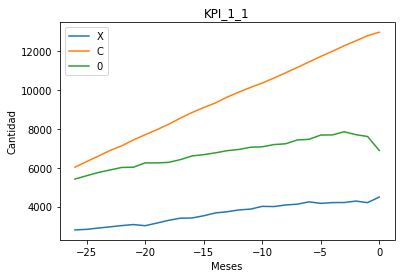

In [20]:
# GRAFICA KPI_1 :  STATUS a través del tiempo

KPI_1_T = KPI_1.transpose() # Transpuesta para tener Index o Status en el eje Y y los meses en el eje x

KPI_1_T['X'].plot( label = 'X')
KPI_1_T['C'].plot( label = 'C' )
KPI_1_T['0'].plot( label = '0')
plt.title("KPI_1_1")
plt.xlabel("Meses")
plt.ylabel("Cantidad")
plt.legend()

plt.savefig("KPI_1_1.jpg")
pos1= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/KPI_exercise/KPI_1_1.jpg'
pos2= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/KPI_1_1.jpg'
shutil.move(pos1,pos2)

plt.show()  

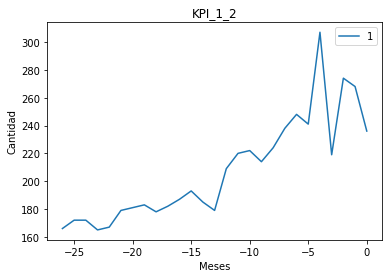

In [22]:
# GRAFICA KPI_1 :  STATUS a través del tiempo

KPI_1_T['1'].plot( label = '1')
plt.title("KPI_1_2")
plt.xlabel("Meses")
plt.ylabel("Cantidad")
plt.legend()

plt.savefig("KPI_1_2.jpg")
pos1= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/KPI_exercise/KPI_1_2.jpg'
pos2= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/KPI_1_2.jpg'
shutil.move(pos1,pos2)

plt.show()

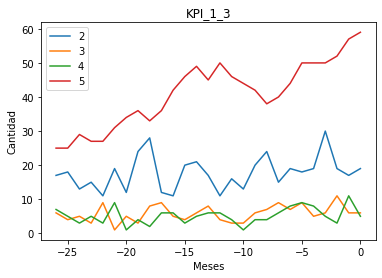

In [23]:
# GRAFICA KPI_1 :  STATUS a través del tiempo

KPI_1_T['2'].plot( label = '2' )
KPI_1_T['3'].plot( label = '3')
KPI_1_T['4'].plot( label = '4' )
KPI_1_T['5'].plot( label = '5')
plt.title("KPI_1_3")
plt.xlabel("Meses")
plt.ylabel("Cantidad")
plt.legend()

plt.savefig("KPI_1_3.jpg")
pos1= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/KPI_exercise/KPI_1_3.jpg'
pos2= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/KPI_1_3.jpg'
shutil.move(pos1,pos2)

plt.show()